# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction. A brief description of the attributes is given here below: 
    
<br> Preg: Number of times pregnant
<br> Plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br> Pres: Diastolic blood pressure (mm Hg)
<br> skin: Triceps skin fold thickness (mm)
<br> test: 2-Hour serum insulin (mu U/ml)
<br> mass: Body mass index (weight in kg/(height in m)^2)
<br> pedi: Diabetes pedigree function
<br> age: Age (years)
<br> class: Class variable (0 or 1)

</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [39]:
#Import all the necessary modules
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mplot

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [3]:
#colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima = pd.read_csv("pima-indians-diabetes.csv") #,names= colnames)
pima.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file.

# Q2. Print 10 samples from the dataset

In [4]:
print(pima.head(10))

   Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [5]:
print("The DataTypes of the PIMA Dataset are below.")
print(pima.dtypes)
print(pima.info())

The DataTypes of the PIMA Dataset are below.
Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

# Q5 Print the descriptive statistics of each & every column using describe() function

In [7]:
pima.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [8]:
print("Observation - Class is not equally distributed.")
print(pima.groupby(["class"]).count())
#mplot.hist(pima, bins=50)

#mplot.gca().set(title='Frequency Histogram', ylabel='Frequency');

Observation - Class is not equally distributed.
       Preg  Plas  Pres  skin  test  mass  pedi  age
class                                               
0       500   500   500   500   500   500   500  500
1       268   268   268   268   268   268   268  268


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

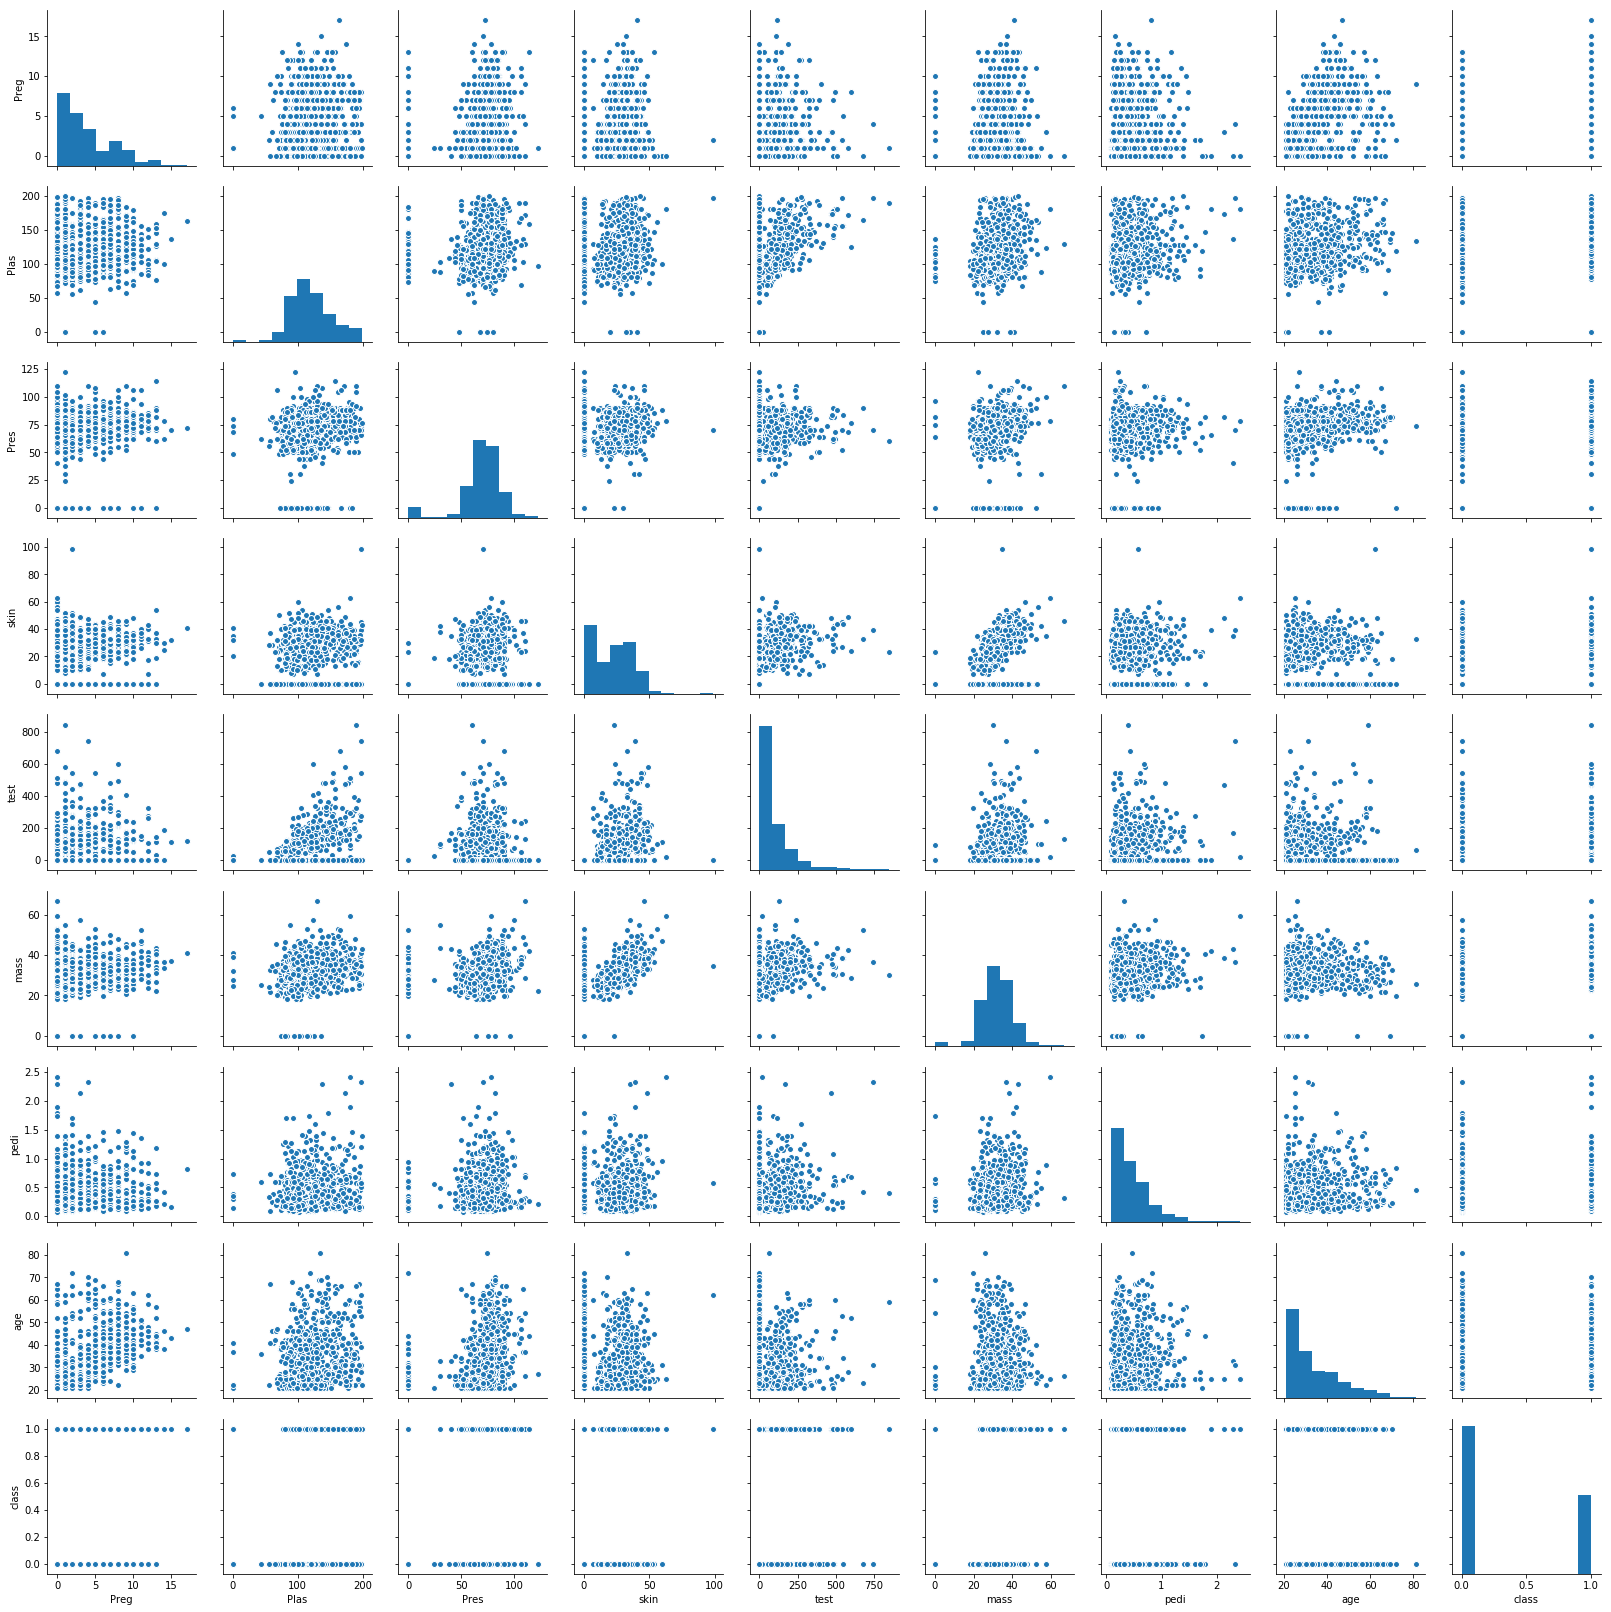

In [12]:
sb.pairplot(pima)

In [15]:
print(pima.std())
print(pima.corr())

Preg       3.369578
Plas      31.972618
Pres      19.355807
skin      15.952218
test     115.244002
mass       7.884160
pedi       0.331329
age       11.760232
class      0.476951
dtype: float64
           Preg      Plas      Pres      skin      test      mass      pedi  \
Preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
Plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
Pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            ag

In [11]:
print("Looking at the coorelation matrix, the below can be observed.")
print("1. xxx column doesn't have much coorelation")
print("2.  ")

Looking at the coorelation matrix, the below can be observed.
1. xxx column doesn't have much coorelation
2.  


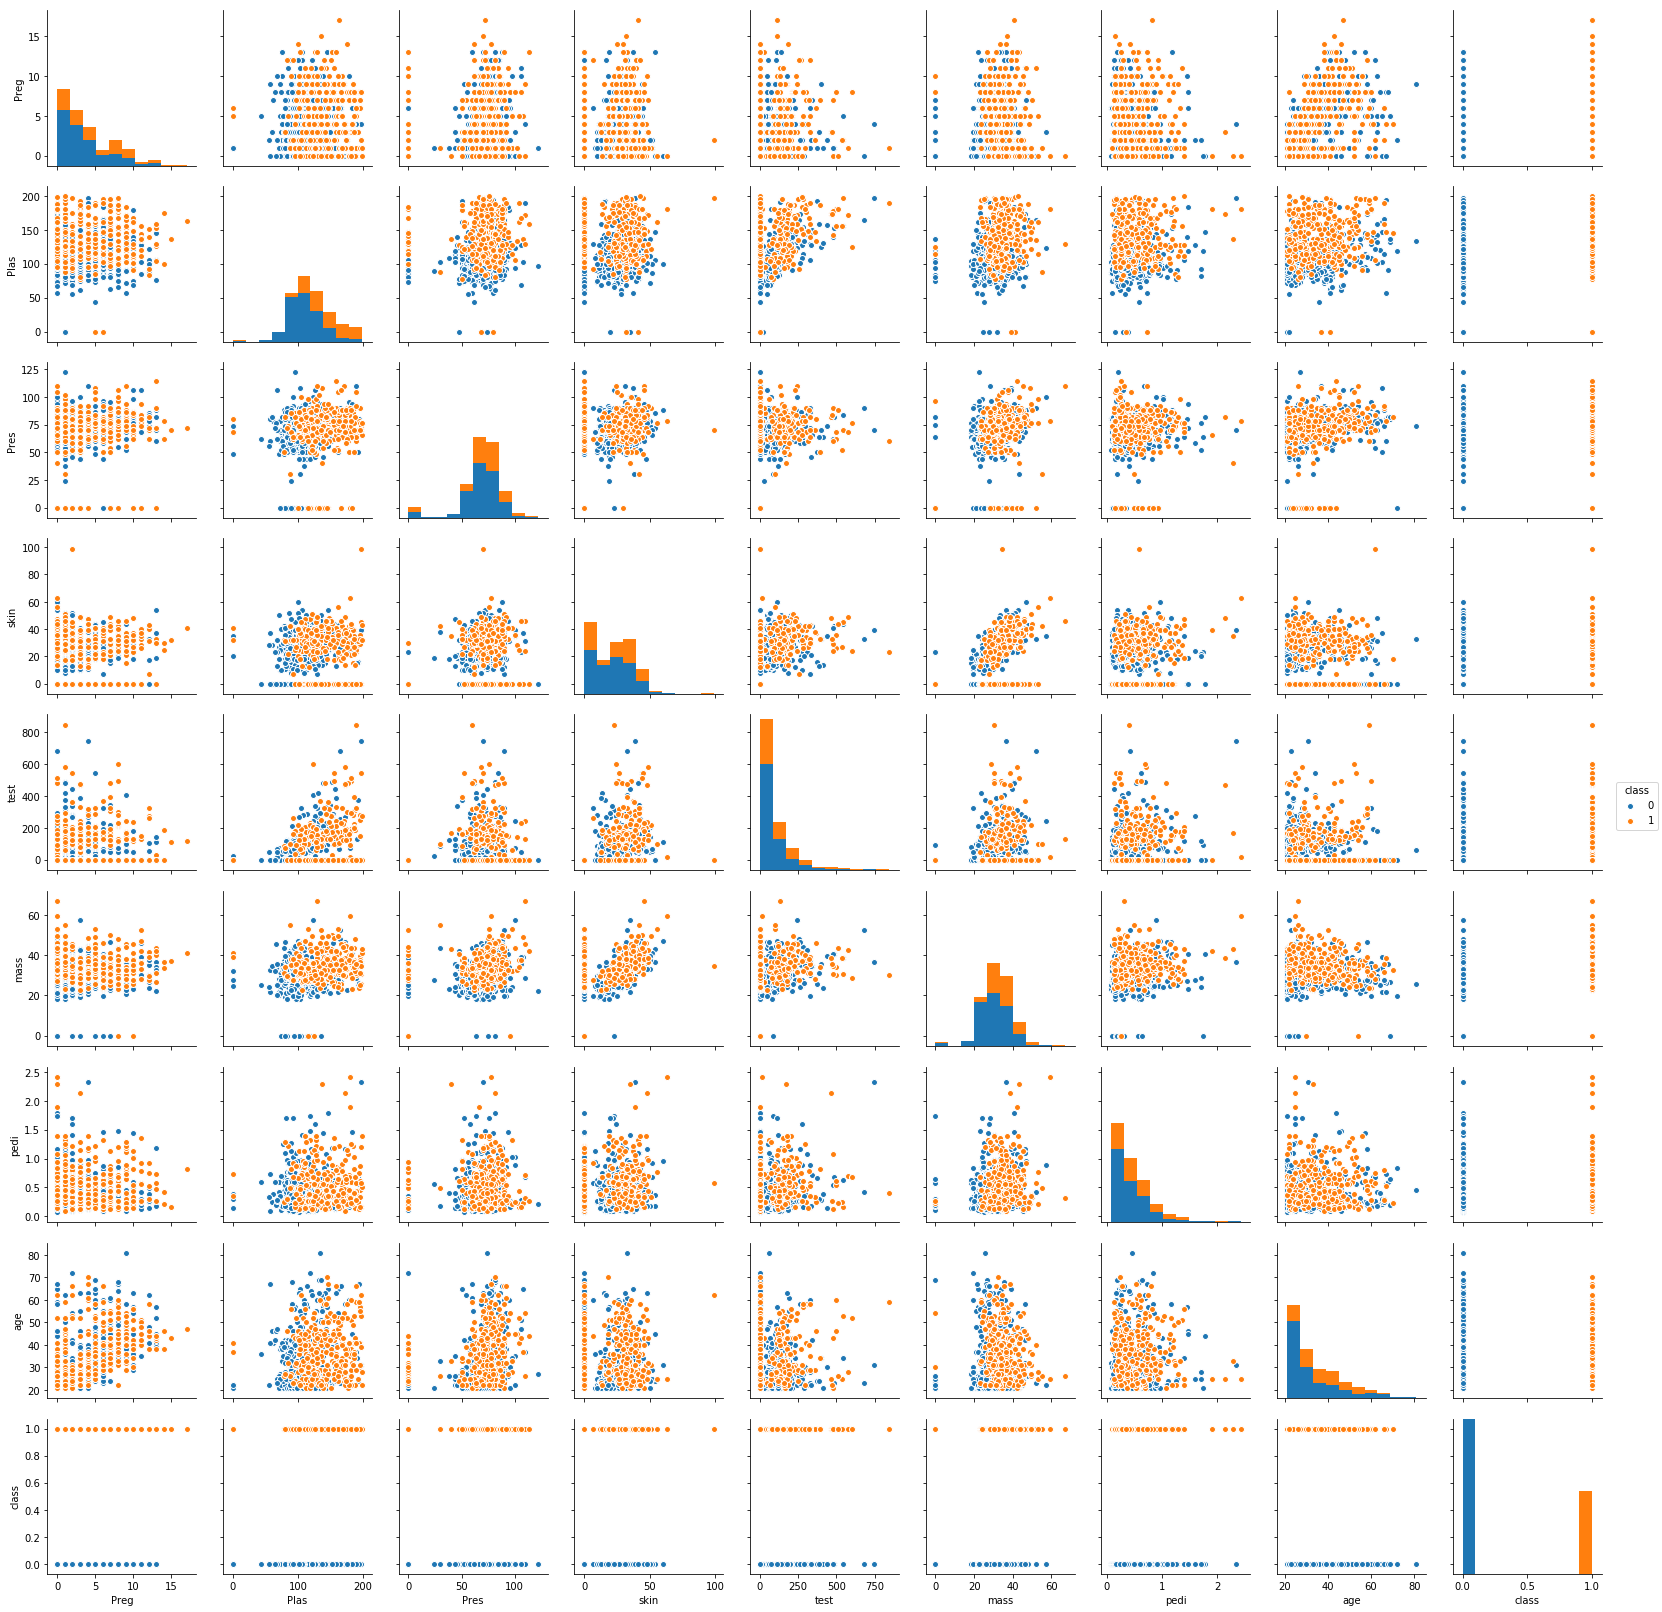

In [50]:
sb.pairplot(pima, hue = "class")

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [20]:
y=pima['class']
X=pima.drop('class',axis=1)
#print(X)
#print(y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [22]:
dt = DecisionTreeClassifier(criterion = 'entropy' )
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [43]:
print("Accuracy of the decision tree model on this PIMA dataset is ", dt.score(X_test , y_test))

Accuracy of the decision tree model on this PIMA dataset is  0.7229437229437229


In [44]:
y_predict = dt.predict(X_test)
print("Confusion Matrix for this PIMA dataset is ", metrics.confusion_matrix(y_test, y_predict))

Confusion Matrix for this PIMA dataset is  [[114  32]
 [ 32  53]]


Print the feature importance of the decision model - Optional

0.7021756647864625
0.7021756647864625
0.7021756647864625
           Imp
Preg  0.057726
Plas  0.249972
Pres  0.129542
skin  0.052192
test  0.056969
mass  0.189748
pedi  0.111226
age   0.152624


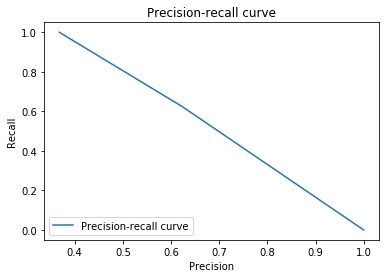

In [47]:

print(f1_score(y_test, y_predict, average="macro"))
print(precision_score(y_test, y_predict, average="macro"))
print(recall_score(y_test, y_predict, average="macro"))    


roc_auc_score(y_test, y_predict)

precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = X_train.columns))

mplot.plot(precision, recall, label='Precision-recall curve')
_ = mplot.xlabel('Precision')
_ = mplot.ylabel('Recall')
_ = mplot.title('Precision-recall curve')
_ = mplot.legend(loc="lower left")
